In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [29]:
data_source = "./dataset/data.csv"
data = pd.read_csv(data_source, delimiter=',')
del data['verification.time']
data.head(10)

# process_B<N>_capacity - Capacity (max number of products to win) of Bidder N. 
# property.price - Price currently verified.
# property.product - Product currently verified.
# property.winner - Bidder currently verified as winner of the product (0 if only price verified).
# verification.result - Binary verification result - is the verified outcome possible? 

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result
0,0,0,2,1,59,1,0,False
1,0,0,2,1,59,2,0,False
2,0,0,2,1,59,4,0,False
3,0,0,2,1,59,6,0,False
4,0,0,2,1,60,1,0,True
5,0,0,2,1,60,1,3,True
6,0,0,2,1,60,1,4,False
7,0,0,2,1,60,2,0,True
8,0,0,2,1,60,2,3,True
9,0,0,2,1,60,2,4,False


In [30]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data[['process.b1.capacity', 
                'process.b2.capacity', 
                'process.b3.capacity', 
                'process.b4.capacity',
                'property.price',
                'property.product',
                'property.winner',
               ]].values

y_train = [int(x) for x in data['verification.result'].values]

K = 5 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[0, 0, 2, 1, 60, 6 , 0]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

[1]


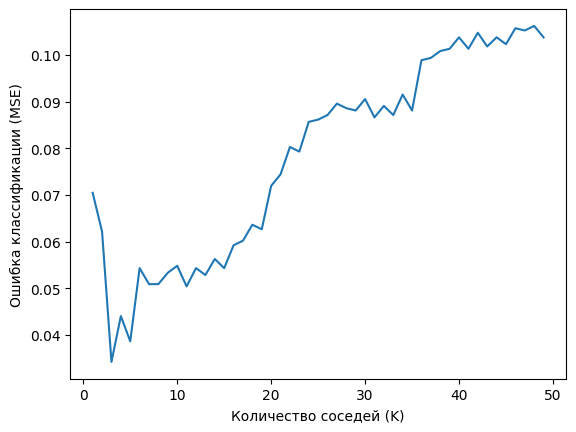

Оптимальные значения K:  [3]


In [31]:
# Реализация процедуры выбора оптимального параметра на основе cross validation error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(
        knn, 
        data.iloc[ : , 0:7 ], 
        data['verification.result'], 
        cv=10, 
        scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data[[
        'process.b1.capacity', 
        'process.b2.capacity', 
        'process.b3.capacity', 
        'process.b4.capacity',
        'property.price',
        'property.product',
        'property.winner',
    ]].values
y_train = data['verification.result'].values

K = 3 # Найденное оптимальное значение соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта

process_b1_capacity = float(input('process_b1_capacity: '))
process_b2_capacity = float(input('process_b2_capacity: '))
process_b3_capacity = float(input('process_b3_capacity: '))
process_b4_capacity = float(input('process_b4_capacity: '))
property_price = float(input('property_price: '))
property_product = float(input("property_product: "))
property_winner = float(input('property_winner: '))

X_new = np.array([[
    process_b1_capacity,
    process_b2_capacity,
    process_b3_capacity,
    process_b4_capacity,
    property_price,
    property_product,
    property_winner
]])

# Получение ответа для нового объекта
target = knn.predict(X_new)

if target == 0:
    result = 'Lose'
else:
    result = 'Win'


print('\nResult: ', result)

process_b1_capacity:  0
process_b2_capacity:  0
process_b3_capacity:  0
process_b4_capacity:  0
property_price:  90
property_product:  2
property_winner:  1



Result:  Win



# Контрольные вопросы
- Особенности методов метрической классификации:

    Метод ближайшего соседа (1NN): Классификация объекта основывается на классе его ближайшего соседа.
    Метод k ближайших соседей (kNN): Классификация объекта определяется большинством классов k ближайших соседей.

- Принципы и этапы реализации метода kNN:

    Принцип: Определение класса объекта основывается на классе его соседей.
    Этапы: Задание количества соседей (K). Вычисление расстояний между объектом и всеми точками обучающей выборки. Выбор K ближайших соседей. Определение класса объекта на основе большинства классов среди соседей.

- Выбор количества соседей:

    Количество соседей выбирается эмпирическим путем или с использованием методов оценки качества, таких как hold-out или кросс-валидация.

- Метод парзеновского окна:

    Это обобщение метода kNN, где вес каждого соседа зависит от расстояния до объекта. Чем дальше сосед, тем меньше его вес.

- Параметры для оптимизации в методах kNN:

    k (количество соседей): Оптимизируется для достижения наилучшей производительности.
    Метрика расстояния: Выбор метрики (евклидово расстояние, манхэттенское расстояние и т.д.) может влиять на результаты.

